Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

### Описание данных

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.


Целевой признак: количество страховых выплат клиенту за последние 5 лет.

## 1. Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('/datasets/insurance.csv')

In [3]:
df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
Пол                  5000 non-null int64
Возраст              5000 non-null float64
Зарплата             5000 non-null float64
Члены семьи          5000 non-null int64
Страховые выплаты    5000 non-null int64
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
df.isna().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [7]:
df['Пол'].value_counts()

0    2505
1    2495
Name: Пол, dtype: int64

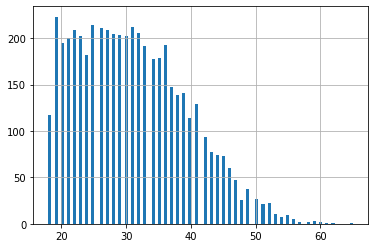

In [8]:
df['Возраст'].hist(bins=100)

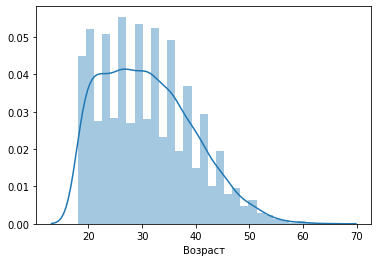

In [9]:
sns.distplot(df['Возраст'])

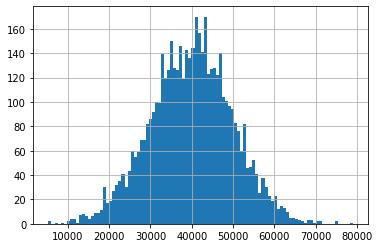

In [10]:
df['Зарплата'].hist(bins=100)

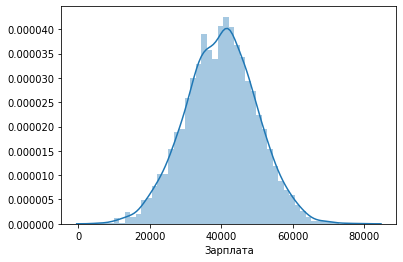

In [11]:
sns.distplot(df['Зарплата'])

In [12]:
df['Члены семьи'].value_counts()

1    1814
0    1513
2    1071
3     439
4     124
5      32
6       7
Name: Члены семьи, dtype: int64

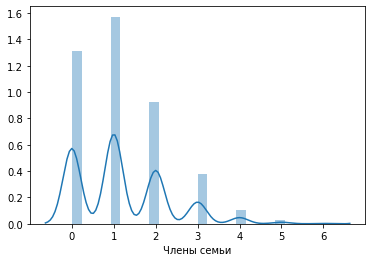

In [13]:
sns.distplot(df['Члены семьи'])

In [14]:
df['Страховые выплаты'].value_counts()

0    4436
1     423
2     115
3      18
4       7
5       1
Name: Страховые выплаты, dtype: int64

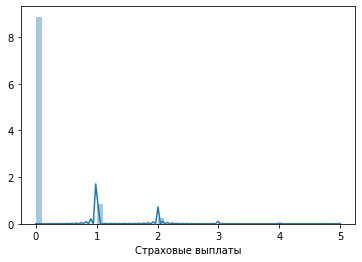

In [15]:
sns.distplot(df['Страховые выплаты'])

## 2. Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Ответьте на вопрос и обоснуйте решение.
Признаки умножают на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Не изменится.

**Обоснование:** 
_______
$P$ - обратимая матрица

$X^{т}$ - транспонированная матрица

$X^{-1}$ - обратная матрица

$X^{т}X$ - квадратная обратная матрица

_______
$XX^{-1} =X^{-1}X$ - единичная матрица ($Е$)

$(XP)^{-1} = X^{-1}P^{-1}$

$(XP)^{т} =X^{т}P^{т}$

$XX^{-1} =X^{-1}X$
_______

$a = Xw$

$a = X(X^{т}X)^{-1}X^т y$

$a = XP((XP)^{т}XP)^{-1}(XP)^т y$

$a = XP(X^{т}P^{т}XP)^{-1}X^{т}P^{т} y$

$a = XPP^{-1}(X^{т}P^{т}X)^{-1}X^{т}P^{т} y$

$a = XPP^{-1}(X^{т}X)^{-1}X^{т}P^{т}(P^{т})^{-1} y$

$PP^{-1}$ и $P^{т}(P^{т})^{-1}$ - единичная матрица ($Е$), при умножении на единичную матрицу (справа или слева) исходная матрица не изменяется:

$a = XЕ(X^{т}X)^{-1}X^{т}Е y$

$a = X(X^{т}X)^{-1}X^{т} y$ - $(X^{т}X)^{-1}X^{т} y = w$

$a = Xw$

## 3. Алгоритм преобразования

**Алгоритм**

- Создадим рандомную обратимую, квадратную матрицу(4х4). Т.к. признаков 4. 
- Обучим модели на преобразованых данных
- Сравним метрики качества r2


**Обоснование**
Обучим модель без шифрования признаков и с зашифрованными признаками. Проверим и сравним метрики качества r2 на полученных данных.

## 4. Проверка алгоритма

In [16]:
target = df['Страховые выплаты']
features = df.drop('Страховые выплаты', axis=1)

In [17]:
# Создадим рандомную обратимую, квадратную матрицу(4х4). Т.к. признаков 4. 
matrix = np.random.normal(size = (4,4))
matrix = np.linalg.inv(matrix)

In [18]:
matrix

array([[-2.47005118,  1.034312  ,  0.57859608,  0.99324946],
       [-0.34086693,  0.13836877, -0.15864785,  0.4397808 ],
       [ 1.26929751, -0.93914545,  0.15683401, -0.25958522],
       [ 0.02755103, -0.31256326, -0.36075263, -0.39878799]])

In [19]:
def ModelLinearRegression(features, target):
    model = LinearRegression()
    model.fit(features,target)
    predict = model.predict(features)
    print('Метрика качества R2:',r2_score(target, predict))

In [20]:
# Обучим модель без шифрования признаков. 
ModelLinearRegression(features, target)

Метрика качества R2: 0.42494550286668


In [21]:
# Обучим модель на зашифрованных признаках. 
ModelLinearRegression(features @ matrix, target)

Метрика качества R2: 0.42494550286667965


## Вывод:

При умножении признаков на обратимую матрицу качество линейной регрессии не изменилось. Метрика r2 сильно не меняет своего значения.